## Types of Unit Root Test:

### <a id='0'> Index </a>

1. <b>[Augmented Dickey Fuller test](#1) </b>

[a) No constant, no trend](#2)

[b) Only constant](#3)

[c) Constant and Trend](#4)

[d) Constant, Linear and Quadratic trend](#5)


2. <b>[Kwiatkowski - Phillips - Schmidt - Shin (KPSS) test](#6) </b>


3. <b>[Phillips - Peron test](#7) </b>


4. <b>[Zivot - Andrews test](#8) </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import libraries for ADF test
from statsmodels.tsa.stattools import adfuller

# Import libraries for KPSS test
from statsmodels.tsa.stattools import kpss

# Import libraries for Phillips-Perron Test
from arch.unitroot import PhillipsPerron

# Import libraries for Elliot-Rothenberg-Stock test(DF-GLS Test)
from arch.unitroot import DFGLS

# Import libraries for Zivot Andrews Test
from arch.unitroot import ZivotAndrews
from statsmodels.tsa.stattools import zivot_andrews

In [3]:
data = pd.read_csv("datasets/bill_data.csv")
#data.head()

### Augmented - Dickey Fuller Test <a id = '1'> </a>

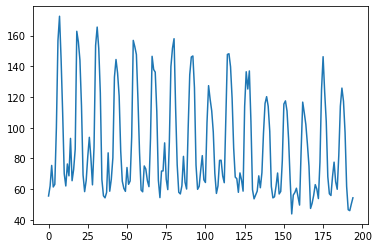

In [4]:
y = data['Amount']

plt.plot(y)
plt.show()

**No constant, no trend:** <a id = '2'> </a>

For a simple AR(1) model,
\begin{equation}
y_{t} = \phi y_{t-1} + \epsilon_{t}
\end{equation}

$H_{0}$ **(NULL Hypothesis): \begin{equation} \phi = 1 \end{equation}**

$H_{a}$ **(Alternate Hypothesis): \begin{equation} \vert\phi\vert <1 \end{equation}**

**Test Statistic:**

\begin{equation}
t_{\phi=1} = \dfrac{\phi-1}{SE(\phi)}
\end{equation}

where $\phi$ is the least square estimate and $SE(\phi)$ is the Standard error of estimate

In [5]:
result = adfuller(y,regression = "nc")

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.104405
p-value: 0.244156
Critical Values:
	1%: -2.578
	5%: -1.943
	10%: -1.615


**It is left tail test and p-value > $\alpha$ at 95% confidence level. Hence we fail to reject NULL Hypothesis. The model has a unit root**.

**First order differencing is performed to check for Stationarity**

In [6]:
data["Diff_Amount"] = data["Amount"].diff()    # Adding first order difference column to the dataset
data.head()

,BilledMonth,Amount,Diff_Amount
0,Jan-00,55.46,NaN
1,Feb-00,61.99,6.53
2,Mar-00,75.38,13.39
3,Apr-00,61.34,-14.04
4,May-00,63.07,1.73


In [7]:
diff_values = data["Diff_Amount"].values
y_diff = diff_values[~np.isnan(diff_values)]  
y = y_diff

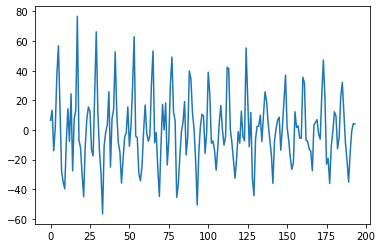

In [8]:
plt.plot(y)

In [9]:
result = adfuller(y,regression = "nc")

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.470489
p-value: 0.000000
Critical Values:
	1%: -2.578
	5%: -1.943
	10%: -1.615


**p-value < $\alpha$ at 95% confidence level. Hence we reject NULL Hypothesis. The model is Stationary**.

[Go to Index](#0)

**Only constant:**    <a id = '3'> </a>

For a simple AR(1) model,
\begin{equation}
y_{t} = c+ \phi y_{t-1} + \epsilon_{t}
\end{equation}

**H0 (NULL Hypothesis): \begin{equation} \phi = 1, c = 0 \end{equation}**

**Ha (Alternate Hypothesis): \begin{equation} \vert\phi\vert <1 \end{equation}**

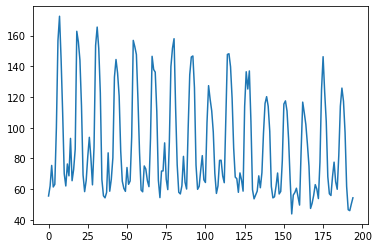

In [10]:
y = data["Amount"]
plt.plot(y)
plt.show()

**Test Statistic:**

\begin{equation}
t_{\phi=1} = \dfrac{\phi-1}{SE(\phi)}
\end{equation}

where $\phi$ is the least square estimate and $SE(\phi)$ is the Standard error of estimate

In [11]:
result = adfuller(y,regression = "c")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.325471
p-value: 0.617440
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


**It is left tail test and p-value > $\alpha$ at 95% confidence level. Hence we fail to reject NULL Hypothesis. The model has a unit root and the constant is insignificant**.

**First order differencing is performed to check for Stationarity**

In [12]:
data["Diff_Amount"] = data["Amount"].diff()  # Adding first order difference column to the dataset
data.head()

,BilledMonth,Amount,Diff_Amount
0,Jan-00,55.46,NaN
1,Feb-00,61.99,6.53
2,Mar-00,75.38,13.39
3,Apr-00,61.34,-14.04
4,May-00,63.07,1.73


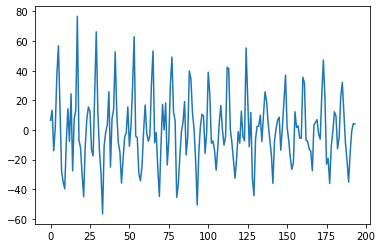

In [13]:
diff_values = data["Diff_Amount"].values
y_diff = diff_values[~np.isnan(diff_values)]
y = y_diff

plt.plot(y)
plt.show()

In [14]:
result = adfuller(y,regression = "c")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.532035
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


**p-value < $\alpha$ at 95% confidence level. Hence we reject NULL Hypothesis. The model is Stationary and the constant c is significant**.

[Go to Index](#0)

**Constant and Trend:**    <a id = '4'> </a>

For a simple AR(1) model,

\begin{equation}
y_{t} = c + \delta t + \phi y_{t-1} + \epsilon_{t}
\end{equation}

**H0 (NULL Hypothesis): \begin{equation} \phi = 1, c = 0, \delta = 0 \end{equation}**

**Ha (Alternate Hypothesis): \begin{equation} \vert\phi\vert <1 \end{equation}**

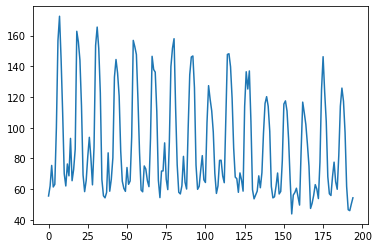

In [15]:
y = data["Amount"]
plt.plot(y)
plt.show()

**Test Statistic:**

\begin{equation}
t_{\phi=1} = \dfrac{\phi-1}{SE(\phi)}
\end{equation}

where $\phi$ is the least square estimate and $SE(\phi)$ is the Standard error of estimate

In [16]:
result = adfuller(y,regression = "ct")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.076076
p-value: 0.112037
Critical Values:
	1%: -4.010
	5%: -3.435
	10%: -3.141


**It is left tail test and p-value > $\alpha$ at 95% confidence level. Hence we fail to reject NULL Hypothesis. The model has a unit root**.

**First order differencing is performed to check for Stationarity**

In [17]:
data["Diff_Amount"] = data["Amount"].diff()       # Adding first order difference column to the dataset
data.head()

,BilledMonth,Amount,Diff_Amount
0,Jan-00,55.46,NaN
1,Feb-00,61.99,6.53
2,Mar-00,75.38,13.39
3,Apr-00,61.34,-14.04
4,May-00,63.07,1.73


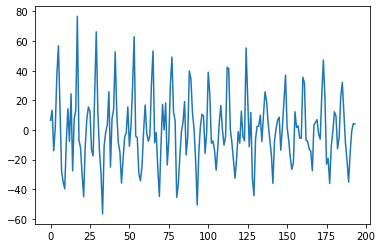

In [18]:
diff_values = data["Diff_Amount"].values
y_diff = diff_values[~np.isnan(diff_values)]
y = y_diff

plt.plot(y)
plt.show()

In [19]:
result = adfuller(y,regression = "ct")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.519186
p-value: 0.000000
Critical Values:
	1%: -4.009
	5%: -3.435
	10%: -3.141


**p-value < $\alpha$ at 95% confidence level. Hence we reject NULL Hypothesis. The model is Stationary and the constant c, linear term $\delta$ are significant**.

[Go to Index](#0)

**Constant,Linear and Quadratic trend:**    <a id = '5'> </a>

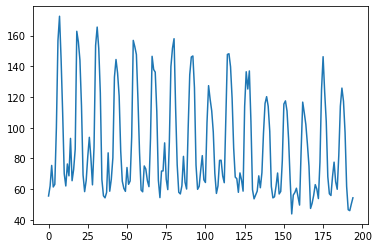

In [20]:
y = data["Amount"]
plt.plot(y)
plt.show()

**Test Statistic:**

\begin{equation}
t_{\phi=1} = \dfrac{\phi-1}{SE(\phi)}
\end{equation}

where $\phi$ is the least square estimate and $SE(\phi)$ is the Standard error of estimate

In [21]:
result = adfuller(y,regression = "ctt")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.219560
p-value: 0.201240
Critical Values:
	1%: -4.436
	5%: -3.865
	10%: -3.574


**It is left tail test and p-value > $\alpha$ at 95% confidence level. Hence we fail to reject NULL Hypothesis. The model has a unit root**.

**First order differencing is performed to check for Stationarity**

In [22]:
data["Diff_Amount"] = data["Amount"].diff()           # Adding first order difference column to the dataset
data.head()

,BilledMonth,Amount,Diff_Amount
0,Jan-00,55.46,NaN
1,Feb-00,61.99,6.53
2,Mar-00,75.38,13.39
3,Apr-00,61.34,-14.04
4,May-00,63.07,1.73


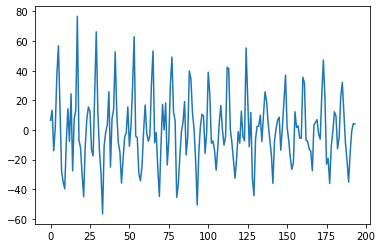

In [23]:
diff_values = data["Diff_Amount"].values
y_diff = diff_values[~np.isnan(diff_values)]
y = y_diff

plt.plot(y)
plt.show()

In [24]:
result = adfuller(y,regression = "ct")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.519186
p-value: 0.000000
Critical Values:
	1%: -4.009
	5%: -3.435
	10%: -3.141


**p-value < $\alpha$ at 95% confidence level. Hence we reject NULL Hypothesis. The model is Stationary**.

[Go to Index](#0)

### Kwiatkowski - Phillips - Schmidt - Shin (KPSS) test:  <a id = '6'> </a>

The test is performed by starting with the model,

\begin{equation}
y_{t} = \beta^{\prime}D_{t}+\mu_{t}+u_{t},
\end{equation}

\begin{equation}
\mu_{t} = \mu_{t-1} + \epsilon_{t}
\end{equation}

where $D_{t}$ is a vector of Deterministic terms(constant and trend), $\mu_{t}$ is random walk

**H0 (NULL Hypothesis): \begin{equation} \sigma^{2} = 0 \end{equation}**
(There's no unit root)

**Ha (Alternate Hypothesis): \begin{equation} \sigma^{2} > 0 \end{equation}**

(Presence of unit root)

In [25]:
y = data["Amount"]
y

0      55.46
1      61.99
2      75.38
3      61.34
4      63.07
       ...  
190    61.68
191    46.50
192    45.91
193    50.27
194    54.26
Name: Amount, Length: 195, dtype: float64

**Test Statistic:**

\begin{equation}
KPSS = \left(T^{-2}\underset{t=1}{\overset{T}{\sum}}S_{t}^{2}\right)/\lambda^{2}
\end{equation}

where $S_{t} = \underset{j=1}{\overset{t}{\sum}}u_{j}$, $u_{t}$ is the residual of a regression of $y_{t}$ on $D_{t}$ and $\lambda^{2}$ is estimator of variance

In [26]:
result = kpss(y,regression = "c")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.597357
p-value: 0.022877
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\anaconda3\lib\site-packages\statsmodels\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


**p-value < $\alpha$ at 95% confidence level. Hence we reject NULL Hypothesis. The series has unit root.**

In [27]:
data["Diff_Amount"] = data["Amount"].diff()           # Adding first order difference column to the dataset
data.head()

,BilledMonth,Amount,Diff_Amount
0,Jan-00,55.46,NaN
1,Feb-00,61.99,6.53
2,Mar-00,75.38,13.39
3,Apr-00,61.34,-14.04
4,May-00,63.07,1.73


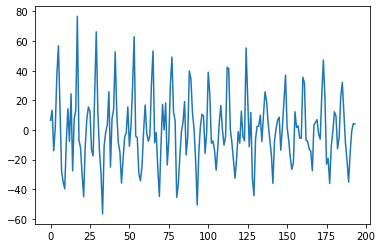

In [28]:
diff_values = data["Diff_Amount"].values
y_diff = diff_values[~np.isnan(diff_values)]
y = y_diff

plt.plot(y)
plt.show()

In [29]:
result = kpss(y,regression = "c")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.058629
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\anaconda3\lib\site-packages\statsmodels\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anaconda3\lib\site-packages\statsmodels\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**p-value > $\alpha$ at 95% confidence level. Hence we fail to reject NULL Hypothesis. The model is Stationary**.

[Go to Index](#0)

### Phillips - Perron Test: <a id = '7'> </a>

The test is performed by starting with the model,

\begin{equation}
\Delta y = \beta^{\prime} D_{t} + (\phi-1)y_{t-1} + \epsilon_{t}
\end{equation}

where $D_{t}$ is a vector of Deterministic terms(constant and trend).

In [30]:
y = data["Amount"]
y

0      55.46
1      61.99
2      75.38
3      61.34
4      63.07
       ...  
190    61.68
191    46.50
192    45.91
193    50.27
194    54.26
Name: Amount, Length: 195, dtype: float64

**Test Statistic**

\begin{equation}
Z_{t} = (\dfrac{\sigma^{2}}{\lambda^{2}})^{1/2}.t_{\phi=1} - \dfrac{1}{2}(\dfrac{\lambda^{2}-\sigma^{2}}{\lambda^{2}}).(\dfrac{T.SE(\phi-1)}{\sigma^{2}})
\end{equation}

where T is the no.of observations and $\sigma^{2}$ $\lambda^{2}$ are estimates of variance

**H0 (NULL Hypothesis): The process contains unit root**

**Ha (Alternate Hypothesis): The process is weakly stationary.**

In [31]:
pp = PhillipsPerron(y)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.164
P-value                         0.001
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


**p-value < $\alpha$ at 95% confidence level. Hence we reject NULL Hypothesis. The process is weakly stationary**

[Go to Index](#0)

## Zivot - Andrews Test:   <a id = '8'> </a>

In [32]:
y = data["Amount"]

$H_{0}$ **(NULL Hypothesis):**  
                        
                        Unit-root process with drift that excludes any structural change

$H_{a}$ **(Alternate Hypothesis):**
            
                             Stationary process with one-time break in the level

In [33]:
zs = zivot_andrews(y, regression = "c")
print('ADF Statistic: %f' % zs[0])
print('p-value: %f' % zs[1])
print('Critical Values:')

for key, value in zs[2].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.236724
p-value: 0.220480
Critical Values:
	1%: -5.276
	5%: -4.811
	10%: -4.566


**It is left tail test and p-value > $\alpha$ at 95% confidence level. Hence we fail to reject NULL Hypothesis. The model has a unit root.**

In [34]:
data["Diff_Amount"] = data["Amount"].diff()          # Adding first order difference column to the dataset
#data.head()

In [35]:
diff_values = data["Diff_Amount"].values
y_diff = diff_values[~np.isnan(diff_values)]
y = y_diff

In [36]:
zs = zivot_andrews(y, regression = "c")
print('ADF Statistic: %f' % zs[0])
print('p-value: %f' % zs[1])
print('Critical Values:')

for key, value in zs[2].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.768916
p-value: 0.000010
Critical Values:
	1%: -5.276
	5%: -4.811
	10%: -4.566


**p-value < $\alpha$ at 95% confidence level. Hence we reject NULL Hypothesis. The model is Stationary**.

[Go to Index](#0)